4. Fig. 3 is a photo of a woman standing in front of an open window2. Convert this to grayscale.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image as Grayscale

In [3]:
filename = 'looking_out.jpg'
img_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)


(a) Use Otsu thesholding to obtain the binary mask for the foreground comprising the
woman and the room. Report the resulting threshold value.

We use THRESH_BINARY_INV because the foreground (woman) is dark and the background (window) is bright. This makes the woman White (255) in the mask.

In [4]:
otsu_thresh_val, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [5]:
print(f"Otsu's calculated threshold value: {otsu_thresh_val}")

Otsu's calculated threshold value: 101.0


(b) Carry out histogram equalization only for the foreground region. What are the hidden
features that are revealed in the resulting image?

In [6]:
hist = cv2.calcHist([img_gray], [0], mask, [256], [0, 256])

Calculate Cumulative Distribution Function

In [7]:
cdf = hist.cumsum()

Normalize CDF to [0, 255]

In [8]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

Apply the CDF to the image

In [9]:
img_equalized = img_gray.copy()

Apply equalization ONLY where the mask is White (255). The background pixels remain untouched

In [10]:
img_equalized[mask == 255] = cdf_final[img_gray[mask == 255]]

 --- Visualization ---

In [11]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Original Grayscale

(-0.5, 4692.5, 5866.5, -0.5)

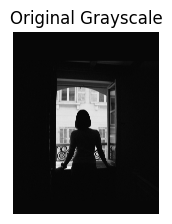

In [12]:
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

Binary Mask (Otsu)

(-0.5, 4692.5, 5866.5, -0.5)

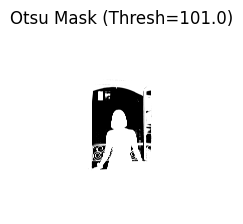

In [13]:
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title(f'Otsu Mask (Thresh={otsu_thresh_val})')
plt.axis('off')

Result (Foreground Equalized)

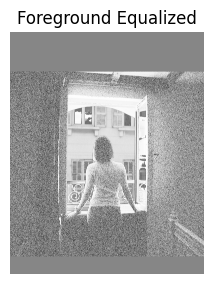

In [16]:
plt.subplot(1, 3, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title('Foreground Equalized')
plt.axis('off')
plt.tight_layout()
plt.show()